In [18]:
### ---- Import Libraries ---- ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.colors as col

### ---- Read Data Files ---- ###

### ---- Read Data Files and Make a 3rd Data File ---- ###

# Read in training data csv file and check head
w_Train = pd.read_csv("trainingData.csv", sep=",")
w_Validate = pd.read_csv("validationData.csv", sep=",")
f_Train = w_Train.copy() #(19937, 529)
f_Validate = w_Validate.copy() #(1111, 529)
### ---- Select / Filter Buildings using Loc function ---- ###
#Min = 0, max = 2

building_0 = f_Train.loc[w_Train['BUILDINGID'] == 0]
building_1 = f_Train.loc[w_Train['BUILDINGID'] == 1]
building_2 = f_Train.loc[w_Train['BUILDINGID'] == 2]


building_0_val = f_Validate.loc[w_Validate['BUILDINGID'] == 0]
building_1_val = f_Validate.loc[w_Validate['BUILDINGID'] == 1]
building_2_val = f_Validate.loc[w_Validate['BUILDINGID'] == 2]

### ---- Filtering on Floor Number for each building ---- ###

# Now filter by Floor Number - later this will be put in a Get_Floor function

###### TRAINING SET ONLY

## Buiding 0: 
b0_f0 = building_0.loc[building_0['FLOOR'] == 0]
b0_f1 = building_0.loc[building_0['FLOOR'] == 1]
b0_f2 = building_0.loc[building_0['FLOOR'] == 2]
b0_f3 = building_0.loc[building_0['FLOOR'] == 3]

## Buiding 1: 
b1_f0 = building_1.loc[building_1['FLOOR'] == 0]
b1_f1 = building_1.loc[building_1['FLOOR'] == 1]
b1_f2 = building_1.loc[building_1['FLOOR'] == 2]
b1_f3 = building_1.loc[building_1['FLOOR'] == 3]
b1_f4 = building_1.loc[building_1['FLOOR'] == 4]

## Buiding 2: 
b2_f0 = building_2.loc[building_2['FLOOR'] == 0]
b2_f1 = building_2.loc[building_2['FLOOR'] == 1]
b2_f2 = building_2.loc[building_2['FLOOR'] == 2]
b2_f3 = building_2.loc[building_2['FLOOR'] == 3]
b2_f4 = building_2.loc[building_2['FLOOR'] == 4]

###### VALIDATION SET ONLY

## Buiding 0: 
b0_f0_val = building_0_val.loc[building_0_val['FLOOR'] == 0]
b0_f1_val = building_0_val.loc[building_0_val['FLOOR'] == 1]
b0_f2_val = building_0_val.loc[building_0_val['FLOOR'] == 2]
b0_f3_val = building_0_val.loc[building_0_val['FLOOR'] == 3]

## Buiding 1: 
b1_f0_val = building_1_val.loc[building_1_val['FLOOR'] == 0]
b1_f1_val = building_1_val.loc[building_1_val['FLOOR'] == 1]
b1_f2_val = building_1_val.loc[building_1_val['FLOOR'] == 2]
b1_f3_val = building_1_val.loc[building_1_val['FLOOR'] == 3]
b1_f4_val = building_1_val.loc[building_1_val['FLOOR'] == 4]

## Buiding 2: 
b2_f0_val = building_2_val.loc[building_2_val['FLOOR'] == 0]
b2_f1_val = building_2_val.loc[building_2_val['FLOOR'] == 1]
b2_f2_val = building_2_val.loc[building_2_val['FLOOR'] == 2]
b2_f3_val = building_2_val.loc[building_2_val['FLOOR'] == 3]
b2_f4_val = building_2_val.loc[building_2_val['FLOOR'] == 4]

In [19]:
### ---- Create a new attribute which combines building and floor in one ---- ###


f_Train["BUILDING_FLOOR"] = f_Train["BUILDINGID"].astype(str) + f_Train["FLOOR"].astype(str)
print(f_Train['BUILDING_FLOOR'])

0        12
1        12
2        12
3        12
4        00
         ..
19932    13
19933    21
19934    13
19935    13
19936    13
Name: BUILDING_FLOOR, Length: 19937, dtype: object


In [20]:
print(f_Train['BUILDING_FLOOR'])
f_Train['BUILDING_FLOOR'] = f_Train['BUILDING_FLOOR'].astype('category')
f_Train['BUILDING_FLOOR'].dtypes

0        12
1        12
2        12
3        12
4        00
         ..
19932    13
19933    21
19934    13
19935    13
19936    13
Name: BUILDING_FLOOR, Length: 19937, dtype: object


CategoricalDtype(categories=['00', '01', '02', '03', '10', '11', '12', '13', '20', '21',
                  '22', '23', '24'],
                 ordered=False)

In [21]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES FOR BUILDING 0 ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = f_Train.iloc[:, 0:520] # WAP columns
y = f_Train.loc[:, "BUILDING_FLOOR"] # Target column

In [22]:
#### ----  GENERIC MODEL PREPROCESSING ---- ###

## TRAIN TEST SPLIT

## Splitting into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
#### ----  MODEL ITERATION 1: LOGISTIC REGRESSION ---- ###

from sklearn.linear_model import LogisticRegression

## Fitting Log Regression to the Training Set

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Assigning the Error Metrics to a variable

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score 

cm_log = confusion_matrix(y_test, y_pred)
acc_log = round(accuracy_score(y_test, y_pred), 4)
prec_log = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_log = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_log = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

C:\Users\49157\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\49157\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [28]:
## Here are the Error Metrics
print("Confusion Matrix is:", cm_log, sep="\n")
print("********************")
print("Accuracy Score is:", acc_log)
print("********************")
print("Precision Score is:", prec_log)
print("********************")
print("Recall Score is:", recall_log)
print("********************")
print("Kappa Score is:", kappa_log)

print("------------------")

Confusion Matrix is:
[[213  14   1   0   0   0   0   0   0   0   0   0   0]
 [ 14 230  14   0   0   0   0   0   0   0   0   0   0]
 [  0  18 268  21   0   0   0   0   0   0   0   0   0]
 [  0   2  19 264   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 275   6   1   0   0   0   0   0   0]
 [  0   0   0   0  13 260   9   0   0   1   0   0   0]
 [  0   0   0   0   4  11 243   4   0   0   0   0   0]
 [  0   0   0   0   1   2  11 160   0   0   0   0   0]
 [  0   0   0   0   0   0   0   8 354  14   0   0   0]
 [  0   0   0   0   0   0   0   0  12 431  22   4   0]
 [  0   0   0   0   0   1   0   0   0  13 281  17   1]
 [  0   0   0   0   0   0   0   0   0   6  13 512   8]
 [  0   0   0   0   0   0   0   0   0   0   0  18 194]]
********************
Accuracy Score is: 0.924
********************
Precision Score is: 0.9242
********************
Recall Score is: 0.924
********************
Kappa Score is: 0.917
------------------


In [31]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = f_Train.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['BUILDING_FLOOR'] == merged_df['PREDICTIONS']
### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


       BUILDING_FLOOR    LONGITUDE      LATITUDE  BUILDINGID  FLOOR  \
id                                                                   
10958             03 -7646.775800  4.864926e+06           0      3   
12425             11 -7474.553700  4.864867e+06           1      1   
322               23 -7349.279600  4.864759e+06           2      3   
2393              23 -7369.414400  4.864768e+06           2      3   
5343              12 -7414.873470  4.864881e+06           1      2   
...              ...          ...           ...         ...    ...   
1373              12 -7520.750473  4.864854e+06           1      2   
11880             21 -7309.849300  4.864813e+06           2      1   
7434              23 -7318.160400  4.864815e+06           2      3   
17722             00 -7589.001500  4.864985e+06           0      0   
17629             03 -7644.034900  4.864930e+06           0      3   

      PREDICTIONS  CHECK  
id   

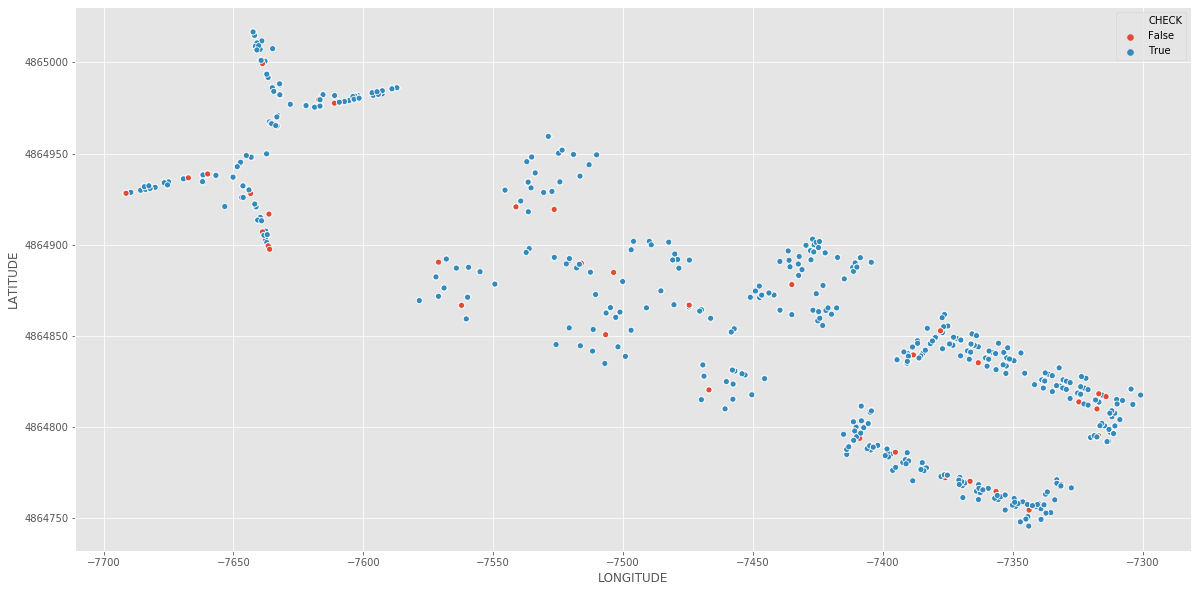

In [33]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)

In [35]:
#### ----  MODEL ITERATION 2: DECISION TREE ---- ###

from sklearn.tree import DecisionTreeClassifier

## Fitting DT Classifier to the training set

clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 42)
clf.fit(X_train, y_train)

## Predicting the test set results
y_pred = clf.predict(X_test)

## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Assigning the Error Metrics to a variable

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score 

cm_dtc = confusion_matrix(y_test, y_pred)
acc_dtc = round(accuracy_score(y_test, y_pred), 4)
prec_dtc = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_dtc = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_dtc = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [37]:
## Here are the Error Metrics

print("Confusion Matrix is:", cm_dtc, sep="\n")
print("********************")
print("Accuracy Score is:", acc_dtc)
print("********************")
print("Precision Score is:", prec_dtc)
print("********************")
print("Recall Score is:", recall_dtc)
print("********************")
print("Kappa Score is:", kappa_dtc)

print("------------------")

Confusion Matrix is:
[[216   4   5   2   0   0   0   1   0   0   0   0   0]
 [  2 241  15   0   0   0   0   0   0   0   0   0   0]
 [  2  11 287   7   0   0   0   0   0   0   0   0   0]
 [  0   1  14 269   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0 275   5   1   1   0   0   0   0   0]
 [  0   0   0   0   3 275   4   1   0   0   0   0   0]
 [  0   0   0   0   0   6 251   5   0   0   0   0   0]
 [  0   0   0   0   0   0  10 164   0   0   0   0   0]
 [  0   0   0   0   0   0   0   8 356   8   1   3   0]
 [  0   0   0   0   0   2   0   0  12 443   8   3   1]
 [  0   0   0   0   0   0   0   0   2   9 289  13   0]
 [  0   0   0   0   0   1   0   0   4   2  11 515   6]
 [  0   0   0   0   0   0   0   0   0   0   3   2 207]]
********************
Accuracy Score is: 0.9498
********************
Precision Score is: 0.9503
********************
Recall Score is: 0.9498
********************
Kappa Score is: 0.9452
------------------


In [39]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = f_Train.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['BUILDING_FLOOR'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


       BUILDING_FLOOR    LONGITUDE      LATITUDE  BUILDINGID  FLOOR  \
id                                                                   
10958             03 -7646.775800  4.864926e+06           0      3   
12425             11 -7474.553700  4.864867e+06           1      1   
322               23 -7349.279600  4.864759e+06           2      3   
2393              23 -7369.414400  4.864768e+06           2      3   
5343              12 -7414.873470  4.864881e+06           1      2   
...              ...          ...           ...         ...    ...   
1373              12 -7520.750473  4.864854e+06           1      2   
11880             21 -7309.849300  4.864813e+06           2      1   
7434              23 -7318.160400  4.864815e+06           2      3   
17722             00 -7589.001500  4.864985e+06           0      0   
17629             03 -7644.034900  4.864930e+06           0      3   

      PREDICTIONS  CHECK  
id   

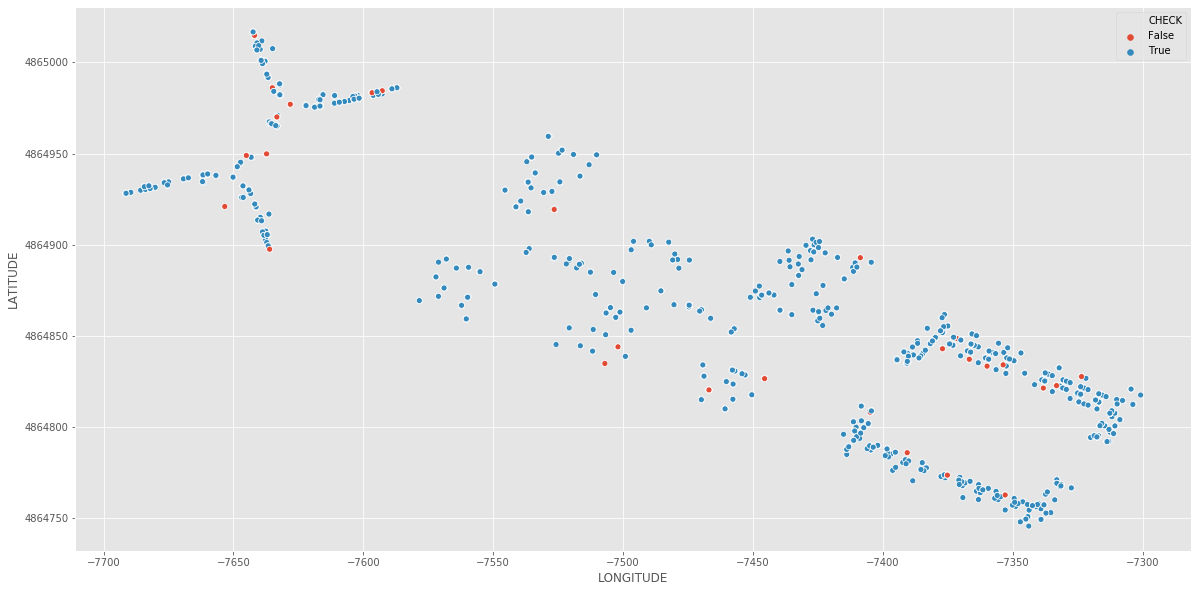

In [41]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)

In [46]:
#### ---- VISUALISATION OF HOW DECISION TREE SPLITS THE DATA ---- ####

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

### Quick utility function to visualise the output of the classifier

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    ## Plot the training points
#### ----  MODEL ITERATION 3: K NEAREST NEIGHBOUR ---- ####

from sklearn.neighbors import KNeighborsClassifier

## Fitting KNN Classifier to the training set

classifier = KNeighborsClassifier (n_neighbors= 5)
classifier.fit(X_train, y_train)

## Predicting the test set results
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

cm_knn = confusion_matrix(y_test, y_pred)

## Assigning the Error Metrics to a variable

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score 

cm_knn = confusion_matrix(y_test, y_pred)
acc_knn = round(accuracy_score(y_test, y_pred), 4)
prec_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
kappa_knn = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [48]:
## Here are the Error Metrics

print("Confusion Matrix is:", cm_knn, sep="\n")
print("********************")
print("Accuracy Score is:", acc_knn)
print("********************")
print("Precision Score is:", prec_knn)
print("********************")
print("Recall Score is:", recall_knn)
print("********************")
print("Kappa Score is:", kappa_knn)

print("------------------")

Confusion Matrix is:
[[225   3   0   0   0   0   0   0   0   0   0   0   0]
 [ 22 234   2   0   0   0   0   0   0   0   0   0   0]
 [  1   8 278  20   0   0   0   0   0   0   0   0   0]
 [  0   1   5 279   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 282   0   0   0   0   0   0   0   0]
 [  0   0   0   0  10 272   1   0   0   0   0   0   0]
 [  0   0   0   0   1   2 254   5   0   0   0   0   0]
 [  0   0   0   0   0   0   3 165   6   0   0   0   0]
 [  0   0   0   0   0   0   0   0 376   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13 452   4   0   0]
 [  0   0   0   0   0   0   0   1   0   7 299   6   0]
 [  0   0   0   0   0   0   0   1   0   0   0 535   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0 212]]
********************
Accuracy Score is: 0.9687
********************
Precision Score is: 0.9692986180647097
********************
Recall Score is: 0.9686559679037111
********************
Kappa Score is: 0.9658
------------------


In [50]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = f_Train.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['BUILDING_FLOOR'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


       BUILDING_FLOOR    LONGITUDE      LATITUDE  BUILDINGID  FLOOR  \
id                                                                   
10958             03 -7646.775800  4.864926e+06           0      3   
12425             11 -7474.553700  4.864867e+06           1      1   
322               23 -7349.279600  4.864759e+06           2      3   
2393              23 -7369.414400  4.864768e+06           2      3   
5343              12 -7414.873470  4.864881e+06           1      2   
...              ...          ...           ...         ...    ...   
1373              12 -7520.750473  4.864854e+06           1      2   
11880             21 -7309.849300  4.864813e+06           2      1   
7434              23 -7318.160400  4.864815e+06           2      3   
17722             00 -7589.001500  4.864985e+06           0      0   
17629             03 -7644.034900  4.864930e+06           0      3   

      PREDICTIONS  CHECK  
id   

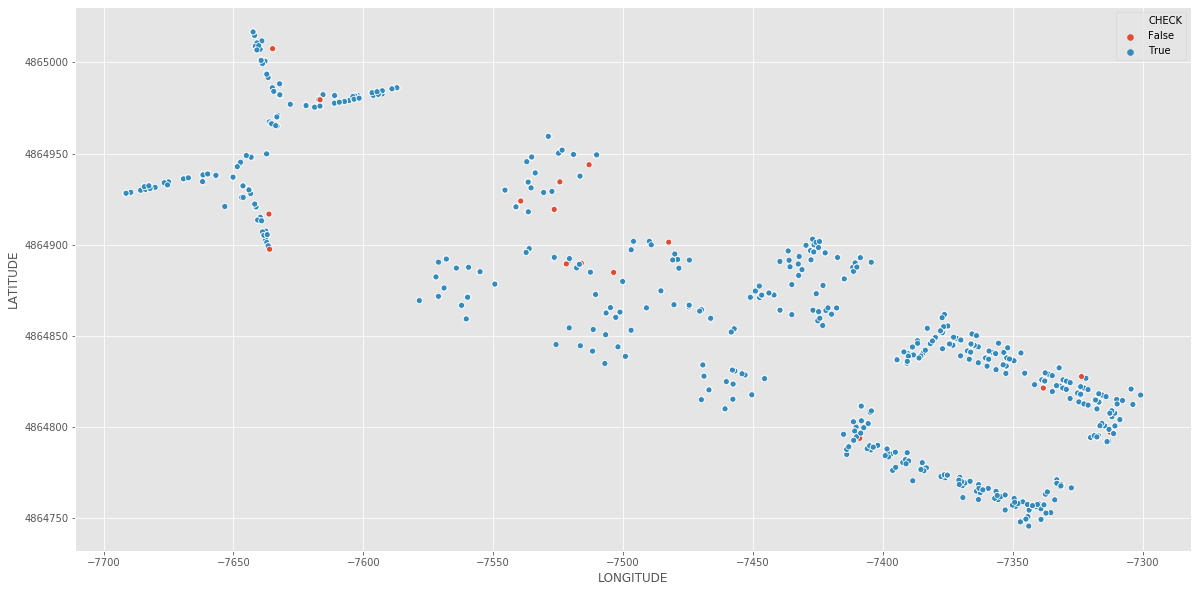

In [52]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)

In [54]:
#### ----  MODEL ITERATION 4: RANDOM FOREST PART 2 RF ---- ####

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Fitting KNN Classifier to the training set

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

## Predicting the test set results
y_pred = rf_clf.predict(X_test)

## Assigning the Error Metrics to a variable

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score 

cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = round(accuracy_score(y_test, y_pred), 4)
prec_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
kappa_rf = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [56]:
## Here are the Error Metrics

print("Confusion Matrix is:", cm_rf, sep="\n")
print("********************")
print("Accuracy Score is:", acc_rf)
print("********************")
print("Precision Score is:", prec_rf)
print("********************")
print("Recall Score is:", recall_rf)
print("********************")
print("Kappa Score is:", kappa_rf)

print("------------------")

Confusion Matrix is:
[[227   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0 258   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1 304   2   0   0   0   0   0   0   0   0   0]
 [  0   0   1 284   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 282   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1 280   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0 261   1   0   0   0   0   0]
 [  0   0   0   0   0   0   1 173   0   0   0   0   0]
 [  0   0   0   0   0   0   0   8 368   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1 467   1   0   0]
 [  0   0   0   0   0   0   0   0   0   4 308   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0 539   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2 210]]
********************
Accuracy Score is: 0.9932
********************
Precision Score is: 0.9933398597324725
********************
Recall Score is: 0.9932296890672017
********************
Kappa Score is: 0.9926
------------------


In [58]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = f_Train.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['BUILDING_FLOOR'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


       BUILDING_FLOOR    LONGITUDE      LATITUDE  BUILDINGID  FLOOR  \
id                                                                   
10958             03 -7646.775800  4.864926e+06           0      3   
12425             11 -7474.553700  4.864867e+06           1      1   
322               23 -7349.279600  4.864759e+06           2      3   
2393              23 -7369.414400  4.864768e+06           2      3   
5343              12 -7414.873470  4.864881e+06           1      2   
...              ...          ...           ...         ...    ...   
1373              12 -7520.750473  4.864854e+06           1      2   
11880             21 -7309.849300  4.864813e+06           2      1   
7434              23 -7318.160400  4.864815e+06           2      3   
17722             00 -7589.001500  4.864985e+06           0      0   
17629             03 -7644.034900  4.864930e+06           0      3   

      PREDICTIONS  CHECK  
id   

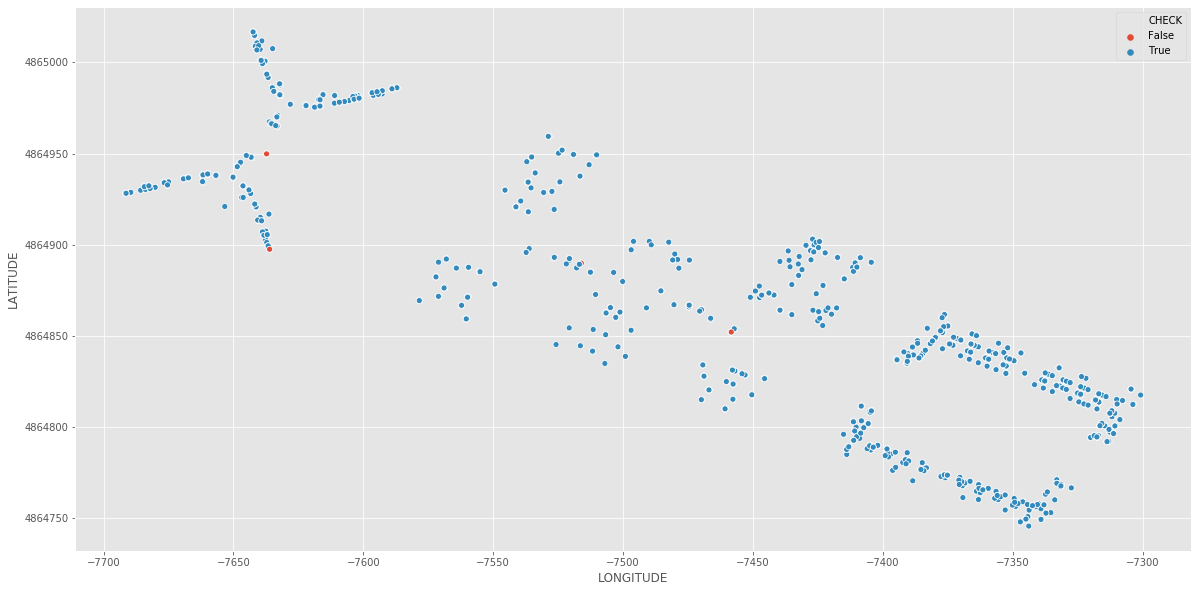

In [59]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)